## Working with Imbalanced Datasets
## By Emma Corbett
## Fall 2024

This project works with an unbalanced dataset to predict the fraudulent transactions from a Credit Card fraud dataset. It utilizes techinques like Balanced Weight, Random Over and Under Sampling, and SMOTE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,auc, average_precision_score, roc_curve, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


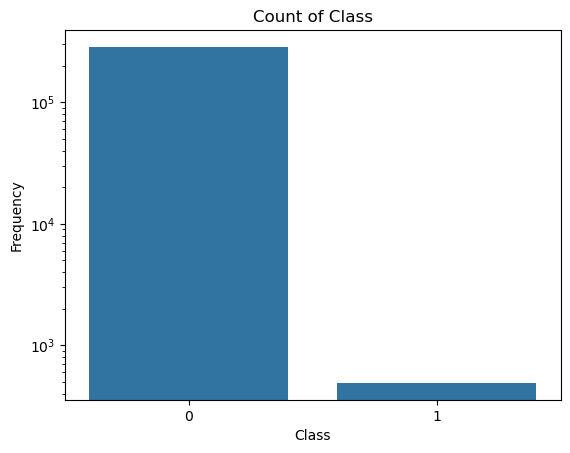

99.82725143693798


In [4]:
# view target var distribution
sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title('Count of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

percentage = (df['Class'].value_counts(normalize=True)[0]) * 100
print(percentage)

### **Pre-processing**


In [5]:
df.pop('Time')

# convert amount to log
eps = 0.001
df['Log Amount'] = np.log(df.pop('Amount') + eps)

In [6]:
# split the dataset into dev and test sets using stratified split
y = df['Class']
X = df.drop(columns=['Class'])

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)


In [7]:
# scale numerical vars
rs = RobustScaler()
X_dev[['Log Amount']] = rs.fit_transform(X_dev[['Log Amount']])
amount = X_dev['Log Amount']
rest_of_columns = X_dev.drop(columns=['Log Amount'])
max_abs = MaxAbsScaler()
rest_scaled = pd.DataFrame(max_abs.fit_transform(rest_of_columns), columns=rest_of_columns.columns)
X_dev = pd.concat([rest_scaled, amount.reset_index(drop=True)], axis=1)

rs = RobustScaler()
X_test[['Log Amount']] = rs.fit_transform(X_test[['Log Amount']])
amount = X_test['Log Amount']
rest_of_columns = X_test.drop(columns=['Log Amount'])
max_abs = MaxAbsScaler()
rest_scaled = pd.DataFrame(max_abs.fit_transform(rest_of_columns), columns=rest_of_columns.columns)
X_test = pd.concat([rest_scaled, amount.reset_index(drop=True)], axis=1)

In [8]:
# print the shape of the dev and test set
print(X_dev.shape)
print(X_test.shape)
class_distribution_original = y_dev.value_counts()
print(class_distribution_original)

(227845, 29)
(56962, 29)
Class
0    227451
1       394
Name: count, dtype: int64


### Default Dataset for comparison

In [9]:

dt_model_default = DecisionTreeClassifier(max_depth=10, random_state=42)

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_predict(dt_model_default, X_dev, y_dev, cv=cv)
avg = average_precision_score(y_dev, scores)
print("Average Precision values:", avg)

auc = roc_auc_score(y_dev, scores)
print("Area under the curve: ", auc)


Average Precision values: 0.6295772213417713
Area under the curve:  0.8628474383069554


### Balanced Weight

In [10]:

dt_model_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_predict(dt_model_balanced, X_dev, y_dev, cv=cv)
avg = average_precision_score(y_dev, scores)
print("Average Precision values:", avg)

auc = roc_auc_score(y_dev, scores)
print("Area under the curve: ", auc)

Average Precision values: 0.1598401414588776
Area under the curve:  0.896967572443282


### Random Oversampling

In [11]:

ros = RandomOverSampler(random_state=42)
X_dev_subsample_ros, y_dev_subsample_ros = ros.fit_resample(X_dev, y_dev)

class_distribution_ros = y_dev_subsample_ros.value_counts()
percent = y_dev_subsample_ros.value_counts(normalize=True) * 100
print(class_distribution_ros)
print("Class distibution- percent of class in the target column: ", percent)

print(X_dev_subsample_ros.shape)

Class
0    227451
1    227451
Name: count, dtype: int64
Class distibution- percent of class in the target column:  Class
0    50.0
1    50.0
Name: proportion, dtype: float64
(454902, 29)


In [12]:

dt_model_ros = DecisionTreeClassifier(max_depth=10, random_state=42)

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_predict(dt_model_ros, X_dev_subsample_ros, y_dev_subsample_ros, cv=cv)
avg = average_precision_score(y_dev_subsample_ros, scores)
print("Average Precision values:", avg)

auc = roc_auc_score(y_dev_subsample_ros, scores)
print("Area under the curve: ", auc)

Average Precision values: 0.9909103279139073
Area under the curve:  0.9944273711700543


### Random Undersampling

In [13]:

rus = RandomUnderSampler(replacement=False, random_state=42)
X_dev_subsample_rus, y_dev_subsample_rus = rus.fit_resample(X_dev, y_dev)

class_distribution_rus = y_dev_subsample_rus.value_counts()
percent = y_dev_subsample_rus.value_counts(normalize=True) * 100
print(class_distribution_rus)
print("Class distibution- percent of class in the target column: ", percent)

print(X_dev_subsample_rus.shape)

Class
0    394
1    394
Name: count, dtype: int64
Class distibution- percent of class in the target column:  Class
0    50.0
1    50.0
Name: proportion, dtype: float64
(788, 29)


In [14]:

dt_model_rus = DecisionTreeClassifier(max_depth=10, random_state=42)

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_predict(dt_model_rus, X_dev_subsample_rus, y_dev_subsample_rus, cv=cv)
avg = average_precision_score(y_dev_subsample_rus, scores)
print("Average Precision values:", avg)

auc = roc_auc_score(y_dev_subsample_rus, scores)
print("Area under the curve: ", auc)

Average Precision values: 0.8821383248730964
Area under the curve:  0.9187817258883249


### SMOTE - Synthetic Minority Oversampling Technique

In [15]:

smote = SMOTE(random_state = 42)
X_dev_subsample_smote, y_dev_subsample_smote = smote.fit_resample(X_dev, y_dev)

class_distribution_smote = y_dev_subsample_smote.value_counts()
percent = y_dev_subsample_smote.value_counts(normalize=True) * 100
print(class_distribution_smote)
print("Class distibution- percent of class in the target column: ", percent)

print(X_dev_subsample_smote.shape)

Class
0    227451
1    227451
Name: count, dtype: int64
Class distibution- percent of class in the target column:  Class
0    50.0
1    50.0
Name: proportion, dtype: float64
(454902, 29)


In [16]:

dt_model_smote = DecisionTreeClassifier(max_depth=10, random_state=42)

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=False)
scores = cross_val_predict(dt_model_smote, X_dev_subsample_smote, y_dev_subsample_smote, cv=cv)
avg = average_precision_score(y_dev_subsample_smote, scores)
print("Average Precision values:", avg)

auc = roc_auc_score(y_dev_subsample_smote, scores)
print("Area under the curve: ", auc)

Average Precision values: 0.9775119751675335
Area under the curve:  0.9853221133343004


Plot to compare the various techniques used above

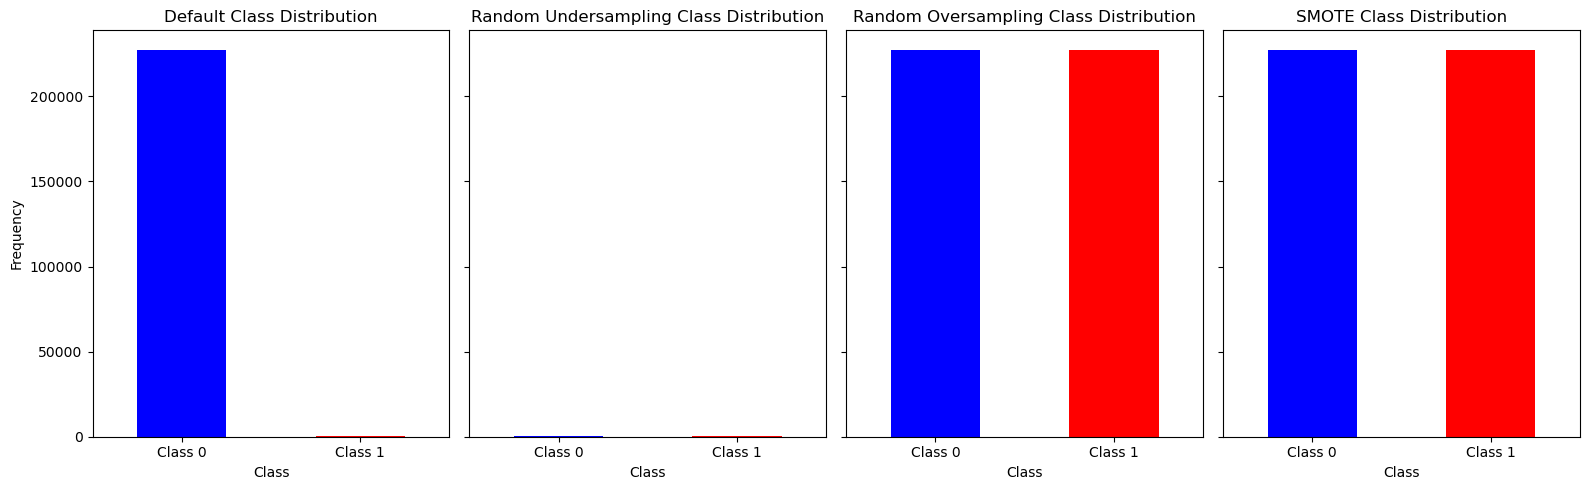

In [17]:

fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)
techniques = ['Default', 'Random Undersampling', 'Random Oversampling', 'SMOTE']
distributions = [class_distribution_original, class_distribution_rus, class_distribution_ros, class_distribution_smote]

for ax, model, distribution in zip(axes, techniques, distributions):
    distribution.plot(kind='bar', ax=ax, color=['blue', 'red'])
    ax.set_title(f'{model} Class Distribution')
    ax.set_xlabel('Class')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(['Class 0', 'Class 1'], rotation=0)

plt.tight_layout()
plt.show()

### **Model Prediction & Evaluation - AUC Scores**


In [18]:

dt_model_default.fit(X_dev, y_dev)
print("Default performance: ", dt_model_default.score(X_test, y_test))
y_pred_proba_default = dt_model_default.predict_proba(X_test)[:, 1]
auc_default = roc_auc_score(y_test, y_pred_proba_default)
print("Default AUC value: ", auc_default, "\n")

dt_model_rus.fit(X_dev_subsample_rus, y_dev_subsample_rus)
print("RUS performance: ", dt_model_rus.score(X_test, y_test))
y_pred_proba_rus = dt_model_rus.predict_proba(X_test)[:, 1]
auc_rus = roc_auc_score(y_test, y_pred_proba_rus)
print("RUS AUC value: ", auc_rus, "\n")

dt_model_ros.fit(X_dev_subsample_ros, y_dev_subsample_ros)
print("ROS performance: ", dt_model_ros.score(X_test, y_test))
y_pred_proba_ros = dt_model_ros.predict_proba(X_test)[:, 1]
auc_ros = roc_auc_score(y_test, y_pred_proba_ros)
print("ROS AUC value: ", auc_ros, "\n")

dt_model_smote.fit(X_dev_subsample_smote, y_dev_subsample_smote)
print("Smote performance: ", dt_model_smote.score(X_test, y_test))
y_pred_proba_smote = dt_model_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
print("Smote AUC value: ", auc_smote, "\n")

dt_model_balanced.fit(X_dev, y_dev)
print("Balanced performance: ", dt_model_balanced.score(X_test, y_test))
y_pred_proba_balanced = dt_model_balanced.predict_proba(X_test)[:, 1]
auc_balanced = roc_auc_score(y_test, y_pred_proba_balanced)
print("Balanced AUC value: ", auc_balanced)

Default performance:  0.9989466661985184
Default AUC value:  0.7277420957127928 

RUS performance:  0.7864892384396616
RUS AUC value:  0.8535665655541902 

ROS performance:  0.9897475509989115
ROS AUC value:  0.8650177150207297 

Smote performance:  0.9729293213019206
Smote AUC value:  0.883401714653222 

Balanced performance:  0.9905551069133809
Balanced AUC value:  0.8651250244048098


The models with high AUC scores on the development test set, namely random oversampling and SMOTE, had lower AUC values on the test set but still had high performance. This makes sense since ROS and SMOTE are both essentially oversampling techniques, which can lead to overfitting. This is why we see higher AUC score estimates for the dev data than the test data.

### **Model Prediction & Evaluation - Confusion Matrix**

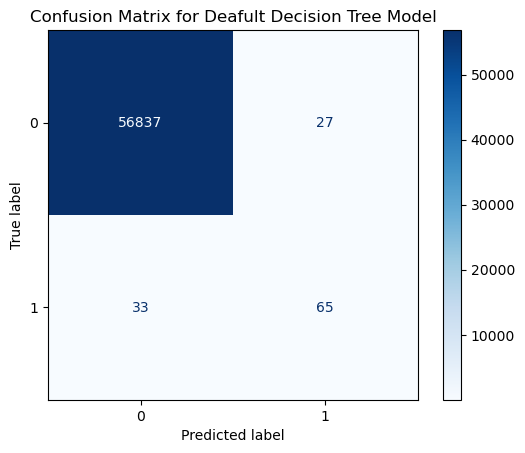

precision:  0.7065217391304348
recall:  0.6632653061224489
f1-score:  0.6842105263157895


In [19]:

y_pred_default = dt_model_default.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_default, cmap='Blues')
plt.title('Confusion Matrix for Deafult Decision Tree Model')
plt.show()

print("precision: ", precision_score(y_test, y_pred_default))
print("recall: ", recall_score(y_test, y_pred_default))
print("f1-score: ", f1_score(y_test, y_pred_default))


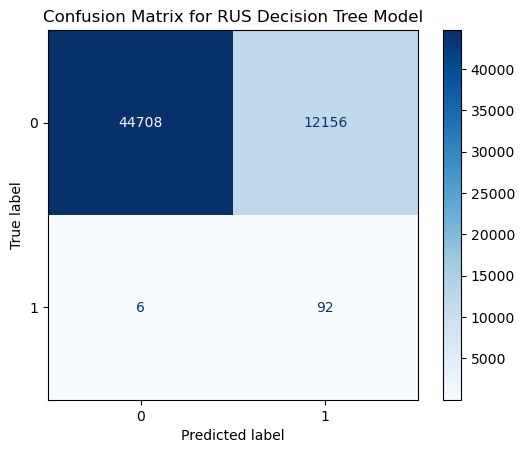

precision:  0.007511430437622469
recall:  0.9387755102040817
f1-score:  0.014903612506074842


In [20]:

y_pred_rus = dt_model_rus.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rus, cmap='Blues')
plt.title('Confusion Matrix for RUS Decision Tree Model')
plt.show()

print("precision: ", precision_score(y_test, y_pred_rus))
print("recall: ", recall_score(y_test, y_pred_rus))
print("f1-score: ", f1_score(y_test, y_pred_rus))

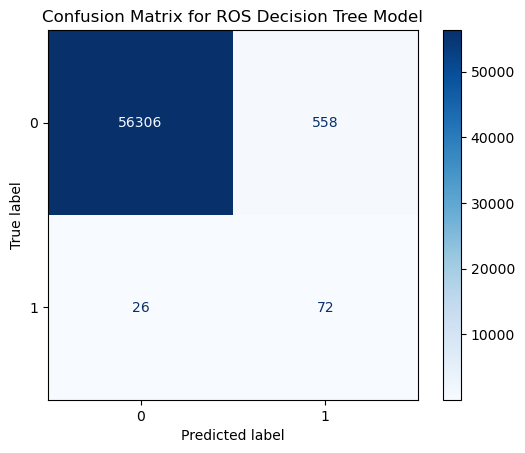

precision:  0.11428571428571428
recall:  0.7346938775510204
f1-score:  0.1978021978021978


In [21]:

y_pred_ros = dt_model_ros.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ros, cmap='Blues')
plt.title('Confusion Matrix for ROS Decision Tree Model')
plt.show()

print("precision: ", precision_score(y_test, y_pred_ros))
print("recall: ", recall_score(y_test, y_pred_ros))
print("f1-score: ", f1_score(y_test, y_pred_ros))

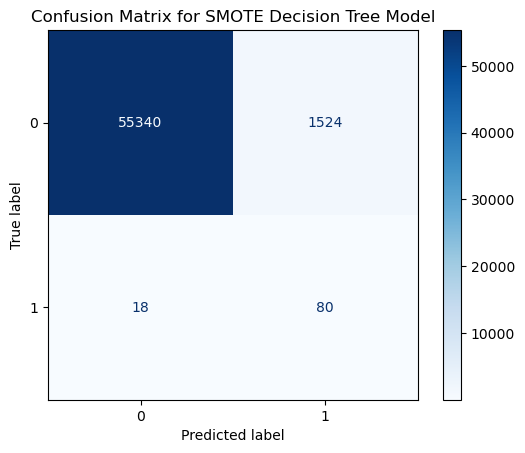

precision:  0.04987531172069826
recall:  0.8163265306122449
f1-score:  0.09400705052878966


In [22]:

y_pred_smote = dt_model_smote.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, cmap='Blues')
plt.title('Confusion Matrix for SMOTE Decision Tree Model')
plt.show()

print("precision: ", precision_score(y_test, y_pred_smote))
print("recall: ", recall_score(y_test, y_pred_smote))
print("f1-score: ", f1_score(y_test, y_pred_smote))

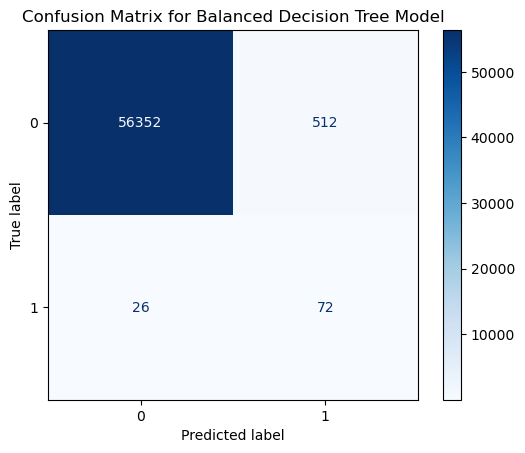

precision:  0.1232876712328767
recall:  0.7346938775510204
f1-score:  0.21114369501466276


In [23]:

y_pred_balanced = dt_model_balanced.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_balanced, cmap='Blues')
plt.title('Confusion Matrix for Balanced Decision Tree Model')
plt.show()

print("precision: ", precision_score(y_test, y_pred_balanced))
print("recall: ", recall_score(y_test, y_pred_balanced))
print("f1-score: ", f1_score(y_test, y_pred_balanced))

It is no surprise to see that throughout the confusion matrixes the majority of the entries are labeled 0 and have a true value of 0. This is because it is the majority class. That being said, we see that for RUS, there are many more false positives than the other models. This is most likely due to loss of information when undersampling. 

The RUS model has the highest recall, however it is clear that is at the cost of the f1-score and precision. The same could be said for the ROS and SMOTE model, though it is less extreme. The SMOTE model may be the best balance of prioritizng recall without completely disregarding f1-score and precision. 

In general, the default decision tree does the best job of balancing recall and precision as demonstrated by it having the highest f1-score. Finally, the balanced tree is similar in performance to the ROS model. 

For the dataset at hand, recall would matter most. This is because false negatives pose a higher risk than false positives. It is better to mistakenly flag a transaction as fraud and have the client override it than to not catch the fraud at all. If the fraud is not labelled, the consequences are much larger since the client could lose their money. Given that maximizes recall minimizes the possibility of false negatives, I would want to focus on recall.

### **Model Prediction & Evaluation - ROC Curves**

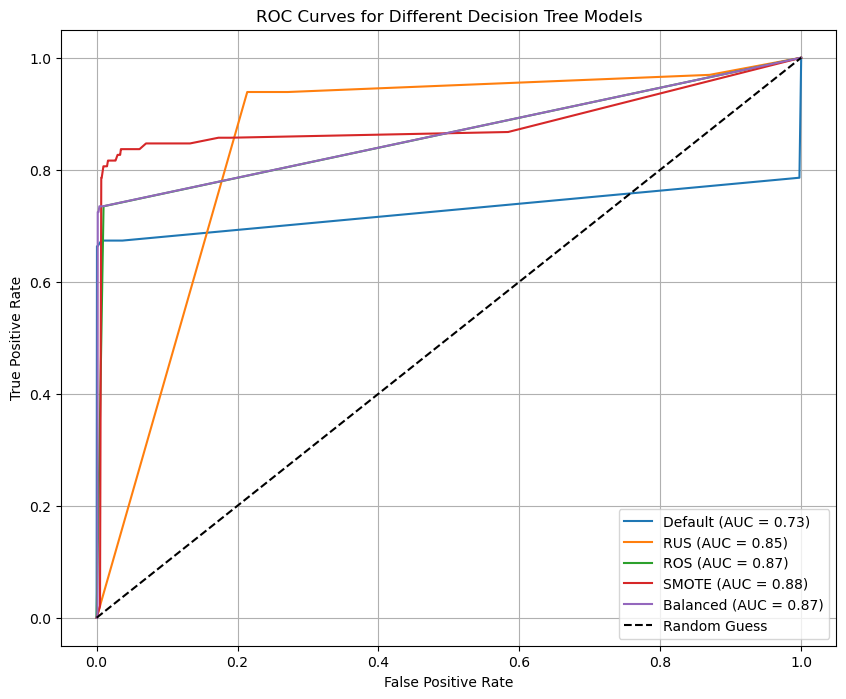

In [24]:

plt.figure(figsize=(10, 8))

# default
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
plt.plot(fpr_default, tpr_default, label=f'Default (AUC = {auc_default:.2f})')

# RUS 
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_pred_proba_rus)
plt.plot(fpr_rus, tpr_rus, label=f'RUS (AUC = {auc_rus:.2f})')

# ROS
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_pred_ros)
plt.plot(fpr_ros, tpr_ros, label=f'ROS (AUC = {auc_ros:.2f})')

# SMOTE
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_proba_smote)
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC = {auc_smote:.2f})')

# Balanced
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_pred_proba_balanced)
plt.plot(fpr_balanced, tpr_balanced, label=f'Balanced (AUC = {auc_balanced:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Decision Tree Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Given the above ROC curves and analysis, I would choose SMOTE as the most approriate technique. It has the highest AUC rate which means that it can best distinguish between positive and negative classes. It is the curve that is closest to the top left corner, which indicates better performance. Not only that, but it has great recall which is what I would want to focus on for this model. 